In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing the seaborn library for data visualization
import seaborn as sns

# Importing the matplotlib library for creating plots and figures
import matplotlib.pyplot as plt

# Importing the math library for mathematical operations
import math

# Importing the LabelEncoder class from sklearn.preprocessing to convert categorical labels to numerical values
from sklearn.preprocessing import LabelEncoder

# Importing the MinMaxScaler class from sklearn.preprocessing to scale features to a range
from sklearn.preprocessing import MinMaxScaler

# Importing the PCA class from sklearn.decomposition for Principal Component Analysis
from sklearn.decomposition import PCA

# Importing train_test_split function from sklearn.model_selection to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing precision_score from sklearn.metrics to calculate precision of the classification model
from sklearn.metrics import precision_score

# Importing recall_score from sklearn.metrics to calculate recall of the classification model
from sklearn.metrics import recall_score

# Importing f1_score from sklearn.metrics to calculate the F1 score of the classification model
from sklearn.metrics import f1_score

# Importing confusion_matrix from sklearn.metrics to generate a confusion matrix for the classification model
from sklearn.metrics import confusion_matrix

# Importing classification_report from sklearn.metrics to generate a detailed classification report
from sklearn.metrics import classification_report

# Importing accuracy_score from sklearn.metrics to calculate the accuracy of the classification model
from sklearn.metrics import accuracy_score

# Importing classifi_report (duplicate import, can be removed as it is already imported above)
from sklearn.metrics import classification_report

# Importing confusion_matrix (duplicate import, can be removed as it is already imported above)
from sklearn.metrics import confusion_matrix

In [ ]:
# ignoring warning
import warnings
warnings.filterwarnings("ignore")

### **Data Preprocessing**

In [ ]:
# load dataset
MyData = pd.read_csv("/content/drive/MyDrive/Project../BankChurners.csv")
MyData.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [ ]:
# shape of the dataset
MyData.shape

(10127, 23)

In [ ]:
# info of the dataset
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# columns of the dataset
MyData.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# drop un-usefull column column
MyData.drop(MyData.columns[[21,22]], axis=1, inplace=True)

In [ ]:
# get the info of the dataset
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# checking the nullvalues
MyData.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# checking the duplicates value in our dataset
MyData.duplicated().sum()

0

In [ ]:
# checking the data_types
MyData.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### **Data visualization**

Bar Char ategorical columns

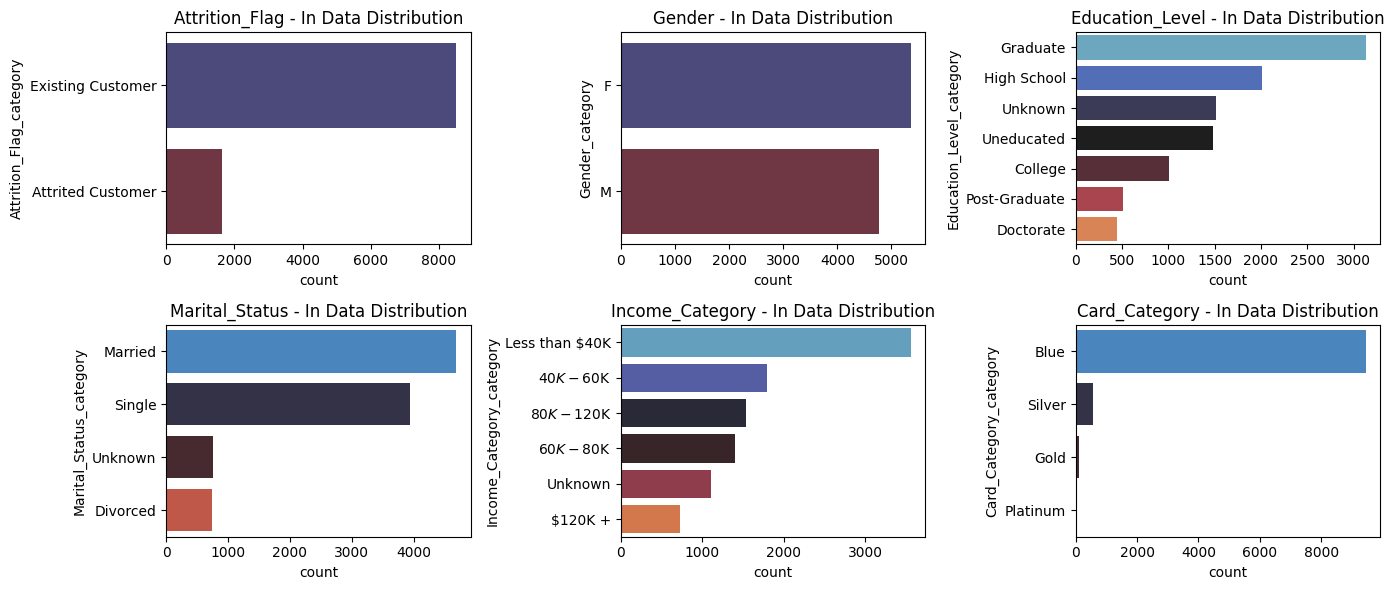

In [ ]:
# Create a list of categorical columns that do not include "date_month."
cat_cols = [col for col in MyData.columns if MyData[col].dtype == 'object' and col != 'date_month']

# Ascertain how many rows and columns the subplots will have.
num_plots = len(cat_cols)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

# Continually create sub-plots according to the quantity of category columns.
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 3))
axs = axs.flatten()

# Make bar graphs by iterating across category columns.
for i, col in enumerate(cat_cols):
    df = MyData[col].value_counts().reset_index()
    df.columns = [col + '_category', 'count']  # Rename the columns for clarity
    sns.barplot(data=df, y=col + '_category', x='count', ax=axs[i], palette='icefire')
    axs[i].set_title(f'{col.title()} - In Data Distribution')

# Include any unused subplots.
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

hitogram: features of the dataset

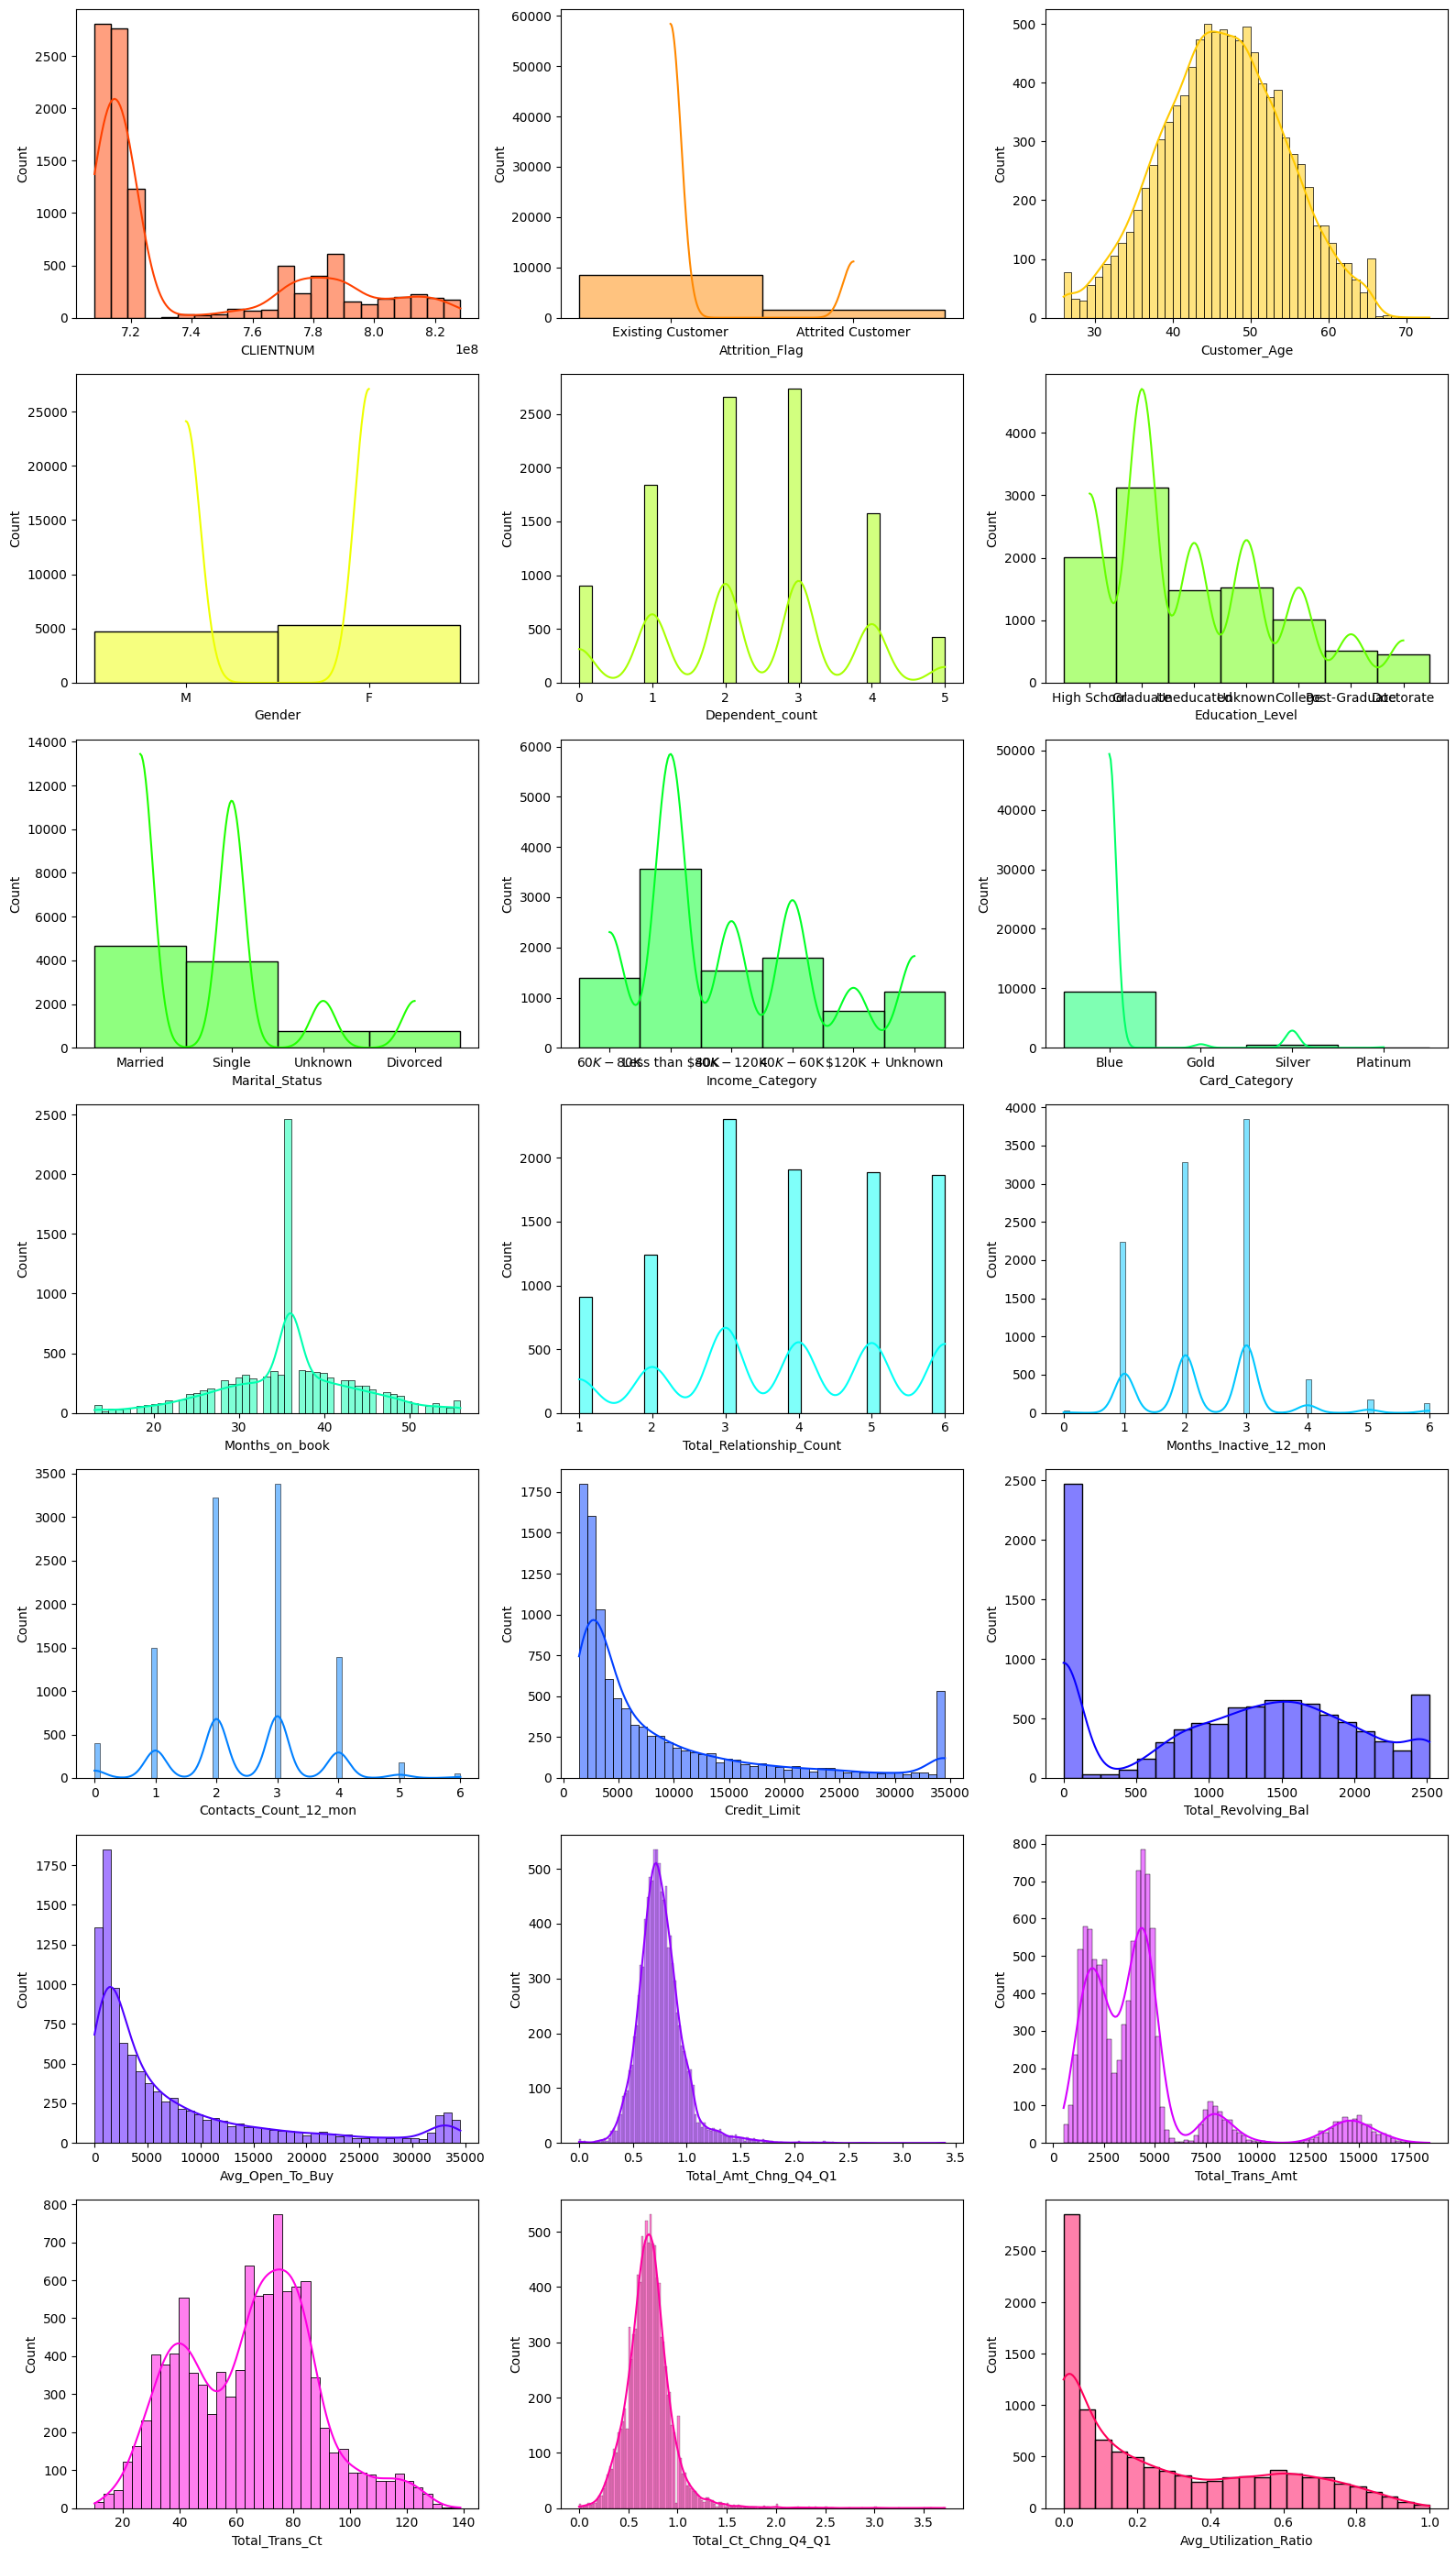

In [ ]:
# Number of columns in your dataset
num_columns = len(MyData.columns)

# Calculate the number of rows needed (assuming 3 columns per row)
num_rows = math.ceil(num_columns / 3)

# Create subplots with increased plot width size
fig, axes = plt.subplots(num_rows, 3, figsize=(16, num_rows * 4))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Define a list of colors
colors = sns.color_palette("hsv", num_columns)

# Plot each column in a subplot with a different color
for i, col in enumerate(MyData.columns):
    sns.histplot(data=MyData, x=col, kde=True, ax=axes[i], color=colors[i])

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **LabelEncoder**

In [ ]:
# Initialize a LabelEncoder object
le = LabelEncoder()

# Loop through each column in MyData that contains object data types
for column in MyData.select_dtypes(include=["object"]):
    # Apply label encoding to the current column
    MyData[column] = le.fit_transform(MyData[column])

# Display the first two rows of the modified dataset
MyData.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


Correlation matrix

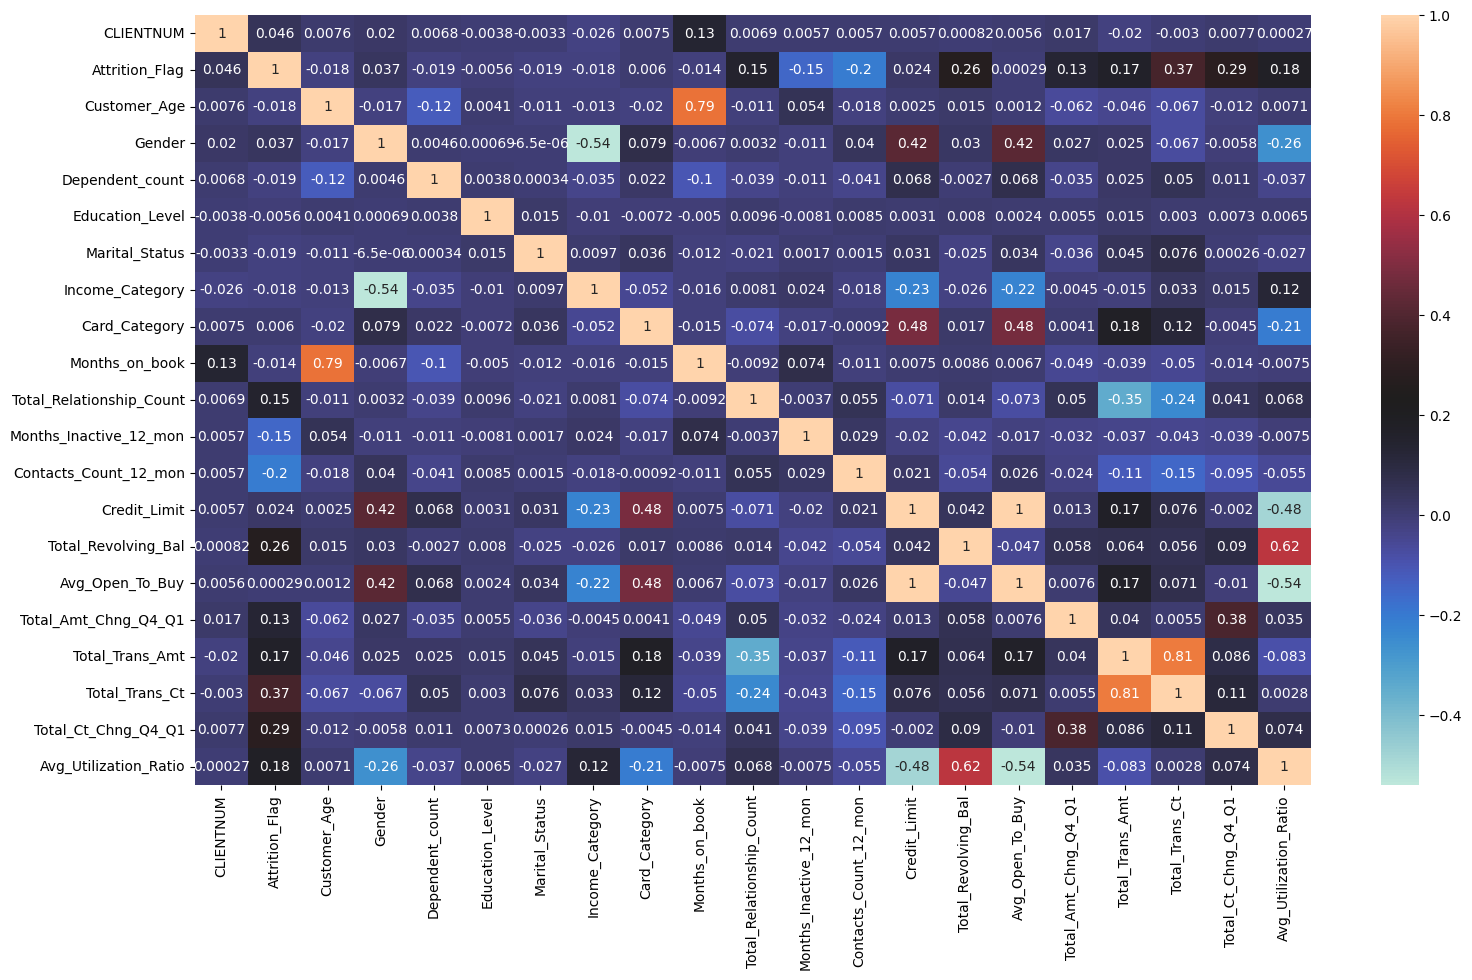

In [ ]:
# Assuming MyData is already defined and corr() has been called
corr_matrix = MyData.corr()

# Create a larger figure
plt.figure(figsize=(18, 10))  # Adjust the figsize as needed

# Create a heatmap of the correlation matrix with a new color palette
sns.heatmap(corr_matrix, annot=True, cmap="icefire")  # You can choose "viridis", "plasma", or another color map

# Display the heatmap
plt.show()

Pie Chart of Attrition_Flag

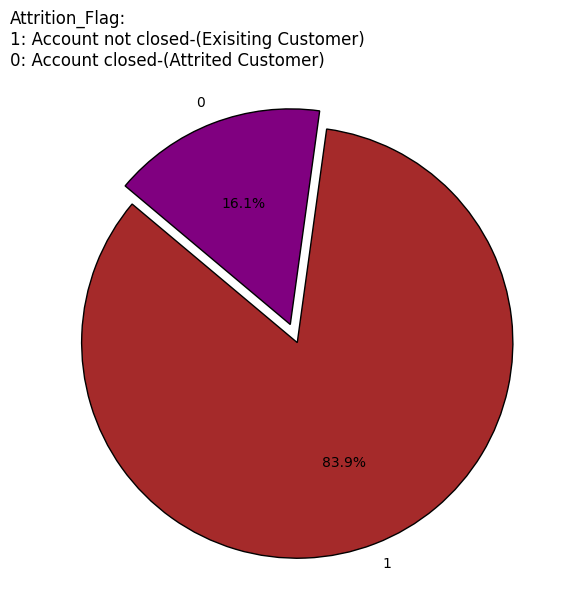

In [ ]:
# Set the figure size to 10x7
plt.figure(figsize=(10, 7))

# Create a pie chart of the distribution of the target variable 'Attrition_Flag', displaying percentages, with specified colors, starting angle, and explode values
MyData['Attrition_Flag'].value_counts().plot(
    kind='pie', autopct='%1.1f%%',
    colors=['brown', 'purple'], startangle=140, explode=(0.09, 0),
    wedgeprops=dict(edgecolor='black'))

# Add explanation about the variable
plt.text(-1.3, 1.2, "Attrition_Flag:\n1: Account not closed-(Exisiting Customer)\n0: Account closed-(Attrited Customer)", fontsize=12)

# Remove the label for the y-axis
plt.ylabel('')

# Display the plot
plt.show()

### **Splitting**

In [ ]:
# Assign feature matrix X by dropping the column 'y'
X = MyData.drop('Attrition_Flag', axis=1)

# Assign target vector y to the column 'y'
y = MyData['Attrition_Flag']

In [ ]:
# y value_counts
y.value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

### **Data Normalization**

In [ ]:
# MinMaxScaler or data noemalization
scaler = MinMaxScaler()

# Normalize the feature matrix X
XScaler = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame
XScaler = pd.DataFrame(XScaler, columns=X.columns)

# Display the first five rows of the normalized data
XScaler.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.504929,0.404255,1.0,0.6,0.500000,0.333333,0.4,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.920398,0.489362,0.0,1.0,0.333333,0.666667,0.8,0.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.049060,0.531915,1.0,0.6,0.333333,0.333333,0.6,0.0,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0.514130,0.297872,0.0,0.8,0.500000,1.000000,0.8,0.0,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
4,0.008517,0.297872,1.0,0.6,0.833333,0.333333,0.4,0.0,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000


### **Feature Selection**

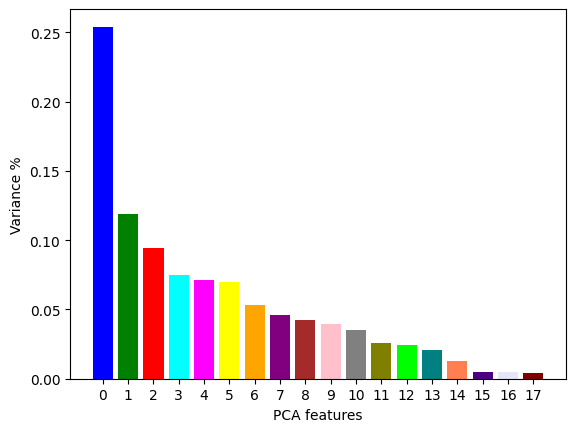

In [ ]:
# Initialize PCA with 18 components
pca = PCA(n_components=18)

# Fit PCA to the scaled data
pca.fit(XScaler)

# Create a range of features
features = range(pca.n_components_)

# Plot the explained variance ratio for each principal component
plt.bar(features, pca.explained_variance_ratio_, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink', 'grey', 'olive', 'lime', 'teal', 'coral', 'indigo', 'lavender', 'maroon'])
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

# Show the plot
plt.show()

### **Data Splitting Into TrainSet_ and TestSet_**

In [ ]:
# Split the data into training and test sets
XDataTrain, XDataTest, yDataTrain, yDataTest = train_test_split(XScaler, y, test_size=0.2, random_state=42)

In [ ]:
# shape of splitted data
print(XDataTrain.shape, XDataTest.shape, yDataTrain.shape, yDataTest.shape)

(8101, 20) (2026, 20) (8101,) (2026,)


### **Model 1: LogisticRegression**

In [ ]:
# importing librararies such as LogisticRegression, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=100),
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Perform grid search to find the best hyperparameters
grid_search.fit(XDataTrain, yDataTrain)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Re-train the model with the best hyperparameters
best_logistic_model = grid_search.best_estimator_
best_logistic_model.fit(XDataTrain, yDataTrain)

# Make predictions on the test data
Y_PredTrain = best_logistic_model.predict(XDataTrain)
Y_PredTest = best_logistic_model.predict(XDataTest)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


### TrainSet

In [ ]:
# Print accuracy score on the training data
print("Accuracy Train  : {:.2f}".format(accuracy_score(yDataTrain, Y_PredTrain)))

# Print precision score on the training data
print("Precision Train : {:.2f}".format(precision_score(yDataTrain, Y_PredTrain)))

# Print recall score on the training data
print("Recall Train    : {:.2f}".format(recall_score(yDataTrain, Y_PredTrain)))

# Print F1 score on the training data
print("F1 Score Train  : {:.2f}".format(f1_score(yDataTrain, Y_PredTrain)))

Accuracy Train  : 0.91
Precision Train : 0.92
Recall Train    : 0.97
F1 Score Train  : 0.95


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for the test data
ClassificationReport_Train = classification_report(yDataTrain, Y_PredTrain)

# Print the classification report
print(ClassificationReport_Train)

              precision    recall  f1-score   support

           0       0.78      0.58      0.67      1300
           1       0.92      0.97      0.95      6801

    accuracy                           0.91      8101
   macro avg       0.85      0.77      0.81      8101
weighted avg       0.90      0.91      0.90      8101



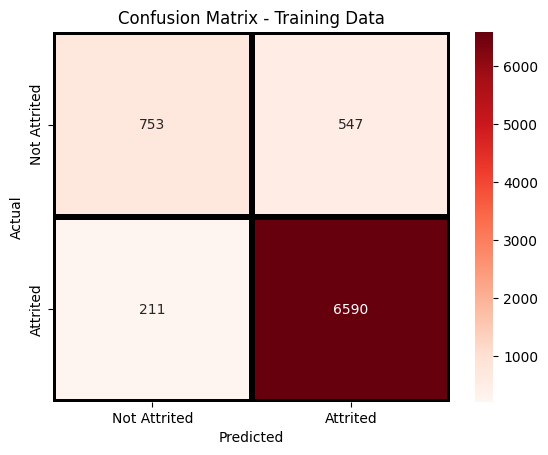

In [ ]:
# Get the predicted labels for the training data
y_pred_train = best_logistic_model.predict(XDataTrain)

# Get the actual labels for the training data
y_true_train = yDataTrain

# Create the confusion matrix for the training data
confusion_matrix_train = confusion_matrix(y_true_train, y_pred_train)

# Define the labels for the confusion matrix
labels = ['Not Attrited', 'Attrited']

# Plot the confusion matrix with red color
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels, linewidth=4,
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### TestSet

In [ ]:
# Print accuracy score on the test data
print("Accuracy Test  : {:.2f}".format(accuracy_score(yDataTest, Y_PredTest)))

# Print precision score on the test data
print("Precision Test : {:.2f}".format(precision_score(yDataTest, Y_PredTest)))

# Print recall score on the test data
print("Recall Test    : {:.2f}".format(recall_score(yDataTest, Y_PredTest)))

# Print F1 score on the test data
print("F1 Score Test  : {:.2f}".format(f1_score(yDataTest, Y_PredTest)))

Accuracy Test  : 0.90
Precision Test : 0.92
Recall Test    : 0.97
F1 Score Test  : 0.94


In [ ]:
# Generate classification report for the test data
ClassificationReport_TestSet = classification_report(yDataTest, Y_PredTest)

# Print the classification report
print(ClassificationReport_TestSet)

              precision    recall  f1-score   support

           0       0.77      0.55      0.64       327
           1       0.92      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



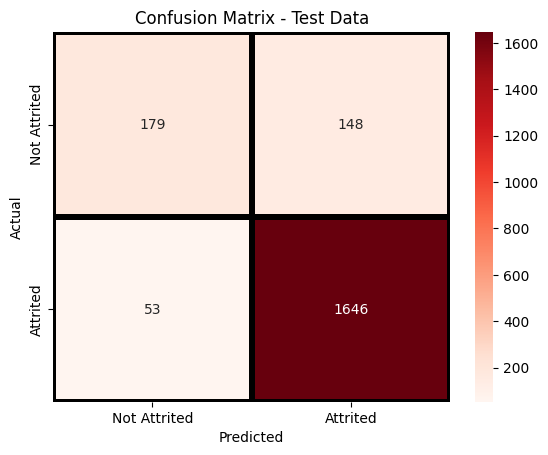

In [ ]:
# Get the predicted labels for the test data
y_pred_test = best_logistic_model.predict(XDataTest)

# Get the actual labels for the test data
y_true_test = yDataTest

# Create the confusion matrix for the test data
confusion_matrix_test = confusion_matrix(y_true_test, y_pred_test)

# Define the labels for the confusion matrix
labels = ['Not Attrited', 'Attrited']

# Plot the confusion matrix with red color
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels, linewidth=4,
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Model: 2 RandomForestClassifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Perform grid search to find the best hyperparameters
grid_search.fit(XDataTrain, yDataTrain)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Re-train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(XDataTrain, yDataTrain)

# Make predictions on the test data
y_pred_rf_train = best_rf_model.predict(XDataTrain)
y_pred_rf_test = best_rf_model.predict(XDataTest)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


### TrainSet

In [ ]:
# Print accuracy score on the test data
print("Accuracy Train  : {:.2f}".format(accuracy_score(yDataTrain, y_pred_rf_train)))

# Print precision score on the test data
print("Precision Train : {:.2f}".format(precision_score(yDataTrain, y_pred_rf_train)))

# Print recall score on the test data
print("Recall Train    : {:.2f}".format(recall_score(yDataTrain, y_pred_rf_train)))

# Print F1 score on the test data
print("F1 Score Train  : {:.2f}".format(f1_score(yDataTrain, y_pred_rf_train)))

Accuracy Train  : 1.00
Precision Train : 1.00
Recall Train    : 1.00
F1 Score Train  : 1.00


In [ ]:
# Train Data
print(classification_report(yDataTrain, y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      6801

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



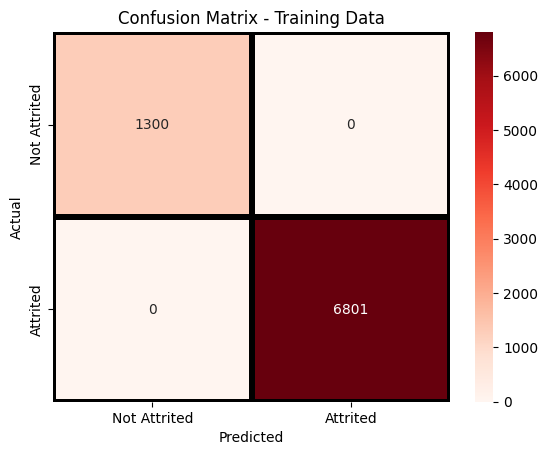

In [ ]:
# Create the confusion matrix for the training data
confusion_matrix_train = confusion_matrix(yDataTrain, y_pred_rf_train)

# Define the labels for the confusion matrix
labels = ['Not Attrited', 'Attrited']

# Plot the confusion matrix with red color
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels, linewidth=4,
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### TestSet

In [ ]:
# Print accuracy score on the test data
print("Accuracy Test  : {:.2f}".format(accuracy_score(yDataTest, y_pred_rf_test)))

# Print precision score on the test data
print("Precision Test : {:.2f}".format(precision_score(yDataTest, y_pred_rf_test)))

# Print recall score on the test data
print("Recall Test    : {:.2f}".format(recall_score(yDataTest, y_pred_rf_test)))

# Print F1 score on the test data
print("F1 Score Test  : {:.2f}".format(f1_score(yDataTest, y_pred_rf_test)))

Accuracy Test  : 0.96
Precision Test : 0.96
Recall Test    : 0.99
F1 Score Test  : 0.98


In [ ]:
# classification report of the model
print(classification_report(yDataTest, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



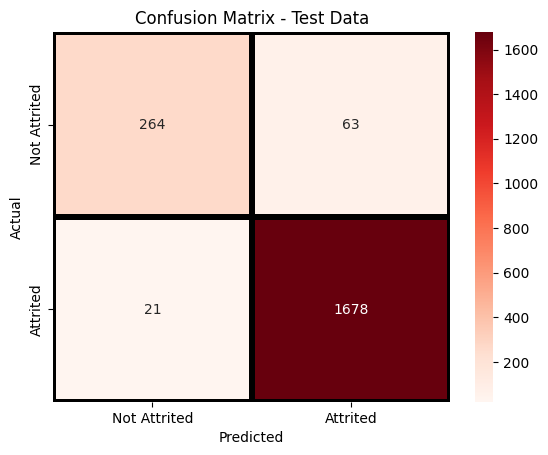

In [ ]:
# Create the confusion matrix for the test data
confusion_matrix_test = confusion_matrix(yDataTest, y_pred_rf_test)

# Define the labels for the confusion matrix
labels = ['Not Attrited', 'Attrited']

# Plot the confusion matrix with red color
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels, linewidth=4,
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()